# Gaussian Mixture Model

Gaussian Mixture Model(GMM) is a probabilistic model that uses gaussian distribution to fit the data into different clusters by estimating the probability of every given datapoint in the dataset. It is an **unsupervised clustering & density estimation** technique. The boundary of GMM is soft, which means the clusters may overlap. From the result of GMM, we can know the probability of being in each k clusters for each datapoint. 

Let give an example of what kind of problem do GMM help us to solve. For example, if we have a bunch of datapoint in 1 dimensional space, and if we know which data is from which group, then it will be easy for us to fit a gaussian distribution for each group. We'll just need to calculate the mean and variance of each group and put the parameter in gaussian distribution, then we'll know how will the distribution be. However, the problem we have now is that we don't know any information about which datapoint come from which group. How do we fit gaussian on it? Somehow we will need to estimate it. When estimating the mean and variance for each cluster, or people often refer io it as componenet for GMM, we use EM algorithm to estimate it. I will describe in detail in the following paragraph.

Based on the result of EM step, we will get an estimated mean and variance for each group. The same as Kmeans algorithm, we need to tell GMM how many component we want to fit for our dataset. Another question comes to mind is how do we know how many component we should use to fit our data? AIC and BIC is often used to choose it.

### EM Step

What it do is that it first place gaussians randomly. To make it easier to understand, let's assume we are in two-dimensional space, that is, each data only have two features. We have 10 datapoints, ($x_1, \dots ,x_{10}$). The first step of EM Step is that it will pick randomly ($\mu_a, \alpha_a$) & ($\mu_b, \alpha_b$).

- **E-step**: Then for each datapoint $x_i$, it will calculate $P(b|x_i)$, which basically means that "Does $x_i$ look like it come from b?". The value shows the probability of $x_i$ being in the group $b$. It will also calculate $P(a|x_i)$. Therefore, for each datapoint, we should get a vector of 2 items indicating the probability of being in each 2 components. 
- **M-step**: Based on the probability for each $x_i$, we know that the every datapoint's probability of being in each group for now. What we do next is that we use the probabilty as the weight that each datapoint contribute to each group, we recalculate the mean and variance for each cluster. We basically use the result we get from E-step to update each component's parameter.
- We then repeat the previous two steps until convergence.

The paragraph below describe it in mathematical way.

##### E-step

Following our previous example, now we have 10 datapoints, ($x_1, \dots ,x_{10}$). In the first step of EM Step, it  pick ($\mu_{a1}, \alpha_{a1}$) & ($\mu_{b1}, \alpha_{b1}$) as the starting parameter. Then assume $P(a1) = P(b1)$ for now. We know that

$$P(x_i|b)= \frac{1}{\sqrt{2\pi\alpha_{b1}^2}}exp{\Big( -\frac{(x-\mu_{b1})^2}{2\alpha_{b1}^2} \Big)}$$

From bayes formula, we also know that 

$$P(b|x_i) = \frac{P(x_i|b)P(b)}{P(x_i|b)P(b)+P(x_i|a)P(a)}$$

If in this 2-dimensional space, the distribution of ($\mu_{b1}, \alpha_{b1}$) is in the right hand side of ($\mu_{a1}, \alpha_{a1}$), and the point $x_1$ is in the far right of the line, then $P(x_i|b)$ will be much larger than $P(x_i|a)$. The meaning of $P(x_i|b)$ is that what the probabilty is for $x_i$ to be in the distuibution from $b$.

Therefore, $P(b|x_1)$ will be near to 1. Let say $P_{x1}$'s ($p_{a1}, p_{b1}$) = (0.01, 0.99)

From E-step, we can get the probability for each datapoint. Therefore, we will have 10 vector of length 2.

##### M-step

In M-step, we use the probability vectors that we get from E-step as the weight to get our updated parameter for mean and variance. Our updated parameter will be

$$\mu_{a2} = \frac{p_{a1}x_1+p_{a2}x_2+\dots+p_{a10}x_{10}}{p_{a1}+p_{a2}+\dots+p_{a10}}$$

$$\alpha_{a2} = \frac{p_{a1}(x_1-\mu_{a1})^2+p_{a2}(x_2-\mu_{a2})^2+\dots+p_{a10}(x_{10}-\mu_{a10})^2}{p_{a1}+p_{a2}+\dots+p_{a10}}$$

Similar calculation applys to ($\mu_{b1}, \alpha_{b1}$).

Intuitively, a point give a little bit of its mass to every group. A big difference between GMM and Kmeans is that $P_{xi}$'s ($p_{ai}, p_{bi}$) can only be either (0, 1) or (1, 0), whereas for GMM the two number sum up as 1.

Another to note is that after the first iteration, beside update mean and variance, we will also need to update $P_{a}$ & $P_{b}$. It is calculated as 

$$P_{a} = \frac{{p_{a1}+p_{a2}+\dots+p_{a10}}}{10}$$
$$P_{b} = 1 - P_{a} = \frac{{p_{b1}+p_{b2}+\dots+p_{b10}}}{10}$$

Basically what $P_{a}, P_{b}$ tells us is that what proportion it is for each distribution. We can also think of it as controlling each cluster’s size.

### Log Likelihood Function

In each step, if we want to check whether if EM step is converging, we can use the value of Log Likelihood from each step to check it. 

Notice that in the E-step, ${P(x_i|b)P(b)+P(x_i|a)P(a)}$ is the weighted probability of our data point xi coming from each cluster j, in our case cluster a and b, and summed up all the weighted probability. 

For each step, if we can have a number that represent "how good is it of our model now?", then we can use this number to chekc if the algorithm is converging. We can use the following equation to access it:

$$\prod_{i=1}^{10} \Big({P(x_i|b)P(b)+P(x_i|a)P(a)}\Big)$$

or more generally

$$\prod_{i=1}^{10} \sum_{j=1}^{2} \Big({P(x_i|cluster_j)P(cluster_j)}\Big)$$

where j = a or b.

This basically means that we multiply all the probability for every data point together to obtain a single number that estimates the likelihood of the data fitted under current model’s parameter.

---

### Example: Fitting a GMM Model

In [1]:
%matplotlib inline
import pandas as pd
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
import numpy as np

In [2]:
# Get Data
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

X_iris_df= pd.DataFrame(X_iris)
X_iris_df.columns = iris.feature_names

In [3]:
# Fit a GMM model
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(X_iris)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [4]:
# Get the predicted group
clf.predict(X_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
def plot_clustered_iris(label_list):
    df = pd.DataFrame(dict(sepal_length=X_iris_df['sepal length (cm)'], sepal_width=X_iris_df['sepal width (cm)'], label=label_list))
    sns.lmplot('sepal_length', 'sepal_width', data=df, hue='label', fit_reg=False)
    plt.show()

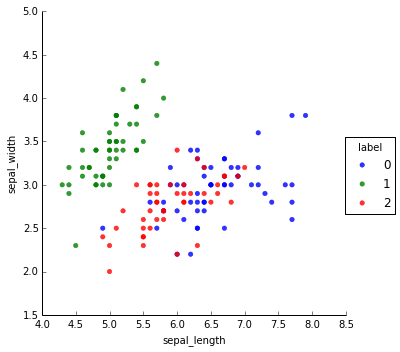

In [6]:
plot_clustered_iris(clf.predict(X_iris))

### Estimate The Number of Gaussians

To estimate the number of Gaussians, we use AIC and BIC as our critirion, which are defined as following:

$$AIC = 2p -2 ln(L)$$
$$BIC = p ln(N) -2 ln(L)$$

* **p**: the number of estimated parameters in the model 
* **L**: the maximum value of the likelihood function for the model
* **N**: the total number of data points

In [7]:
print(clf.bic(X_iris))
print(clf.aic(X_iris))

582.484241068
450.016288128


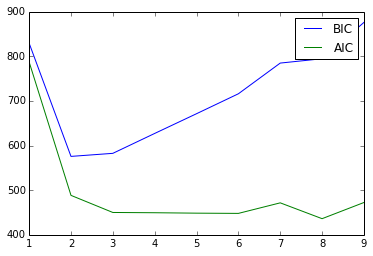

In [8]:
n_components = np.arange(1, 10)
clfs = [mixture.GaussianMixture(n_components=n, covariance_type='full').fit(X_iris) for n in n_components]
bics = [clf_temp.bic(X_iris) for clf_temp in clfs]
aics = [clf_temp.aic(X_iris) for clf_temp in clfs]

plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.legend();

Most of the times, AIC and BIC will agree on the preferred model. However, in our case, AIC pick 7 component as prefered number, and BIC pick 2 as prefered number.

### Example: GMM For Outlier Detection

One thing that GMM can be useful for is outlier detection: we can simply evaluate the likelihood of each point under the model; the points with a suitably low likelihood (where "suitable" is up to your own bias/variance preference) can be labeld outliers.

For now, we have already known that GMM will assign a probability for each data being created by one of the k gaussian distributions. Therefore, we can define outliers as: If all the probabilities of a certain datapoint are lower than p, say 0.05, for every group, then this point is a outlier.

It turns out that instead of checking whether if all the probabilities of a certain datapoint are lower than p, we can just use the likelihood of each datapoint to check if the data is an outlier. 

For the following example, we say that if the weighted probabilty is lower than 0.05, than we say that the datapoint is an outlier.

From the sklean package, we have a method from the GMM model called **score_samples** that will return the log likelihood of each datapoint using the model we fitted. Therefore, we just need to take the exponential of it to get our interested measure, *likelihood*.

In [67]:
X_iris.shape

(150, 4)

In [68]:
# Get the log likelihood and turn it into likelihood of each datapoint
log_likelihood = clf.score_samples(X_iris)
likelihood = np.exp(log_likelihood)

In [69]:
# Filter the weighted likelihood lower than 0.05 from the dataframe
X_iris[np.where(pd.Series(likelihood)<0.05),]

array([[[ 5.8,  4. ,  1.2,  0.2],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 4.5,  2.3,  1.3,  0.3],
        [ 5. ,  3.5,  1.6,  0.6],
        [ 6.2,  2.2,  4.5,  1.5],
        [ 6.3,  2.3,  4.4,  1.3],
        [ 5.1,  2.5,  3. ,  1.1],
        [ 6.3,  3.3,  6. ,  2.5],
        [ 4.9,  2.5,  4.5,  1.7],
        [ 5.8,  2.8,  5.1,  2.4],
        [ 7.7,  3.8,  6.7,  2.2],
        [ 7.7,  2.6,  6.9,  2.3],
        [ 7.7,  2.8,  6.7,  2. ],
        [ 7.9,  3.8,  6.4,  2. ],
        [ 6.1,  2.6,  5.6,  1.4],
        [ 7.7,  3. ,  6.1,  2.3],
        [ 6.9,  3.1,  5.1,  2.3]]])

In [70]:
X_iris_df['outlier'] = [i in list(np.where(pd.Series(likelihood)<0.05)[0]) for i in X_iris_df.index.values]

In [71]:
def plot_clustered_iris_group(group_label,outlier_label):    
    df = pd.DataFrame(dict(sepal_length=X_iris_df['sepal length (cm)'], sepal_width=X_iris_df['sepal width (cm)'], label=group_label, outlier=outlier_label))
    sns.lmplot('sepal_length', 'sepal_width', data=df, hue='outlier',col="label",col_wrap=2, fit_reg=False,markers=["o", "x"], palette="Set2")
    plt.show()

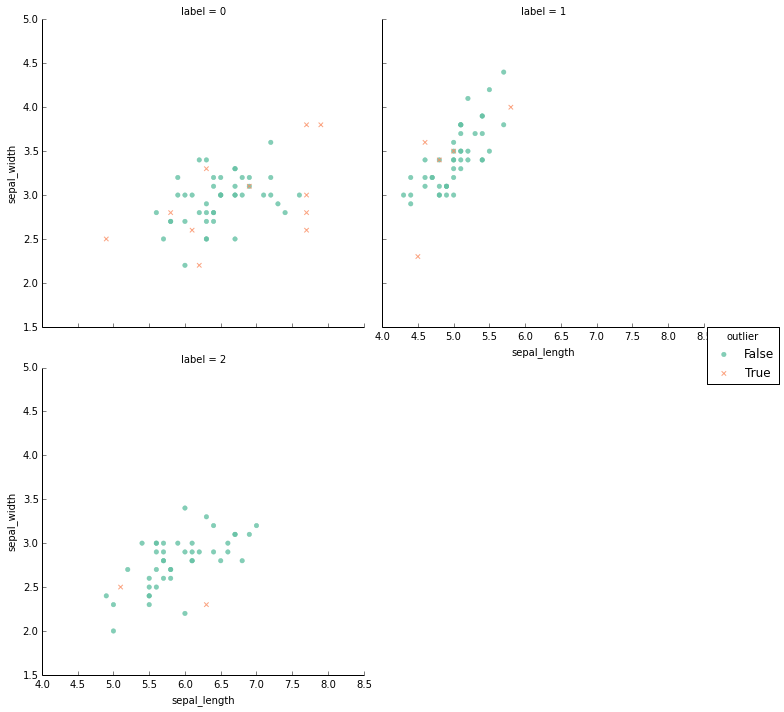

In [72]:
plot_clustered_iris_group(clf.predict(X_iris), X_iris_df['outlier'])

We can see that most point being labeled as outlier are in the outer contour of each group, which actually make sense. 

### Reference

* http://scikit-learn.org/stable/modules/mixture.html
* https://www.youtube.com/watch?v=REypj2sy_5U&list=PLBv09BD7ez_4e9LtmK626Evn1ion6ynrt
* https://github.com/jakevdp/sklearn_tutorial/blob/master/notebooks/04.3-Density-GMM.ipynb
* https://seaborn.pydata.org/generated/seaborn.lmplot.html
* http://sites.northwestern.edu/msia/2016/12/08/k-means-shouldnt-be-our-only-choice/
